In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from datetime import date, timedelta

##### error plot

looking to produce linearly equal spaced predictions for a constant and plot out the error 

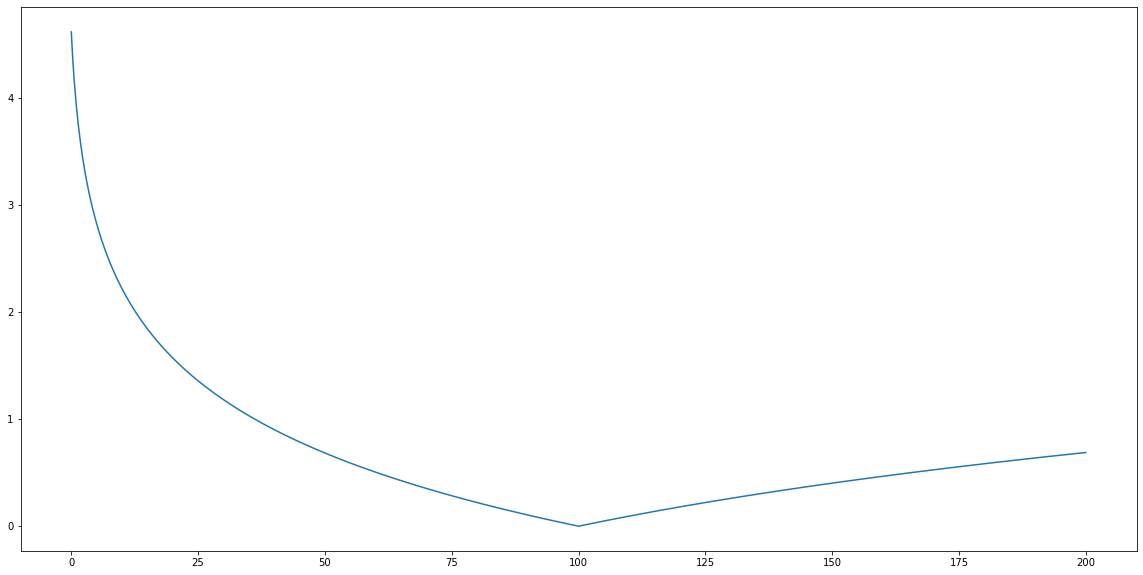

In [5]:
y = 100
x = np.linspace(0,200,1000)
error = [np.sqrt(np.square(np.log(i + 1) - np.log(y +1))) for i in x]
plt.plot(x,error)
plt.show()

##### creating datasets for tableau

In [12]:
# holiday = pd.read_csv("../kaggle_favorita-grocery-sales/data/holidays_events.csv")
# items = pd.read_csv("../kaggle_favorita-grocery-sales/data/items.csv")
# oil = pd.read_csv("../kaggle_favorita-grocery-sales/data/oil.csv")
# sample_sub = pd.read_csv("../kaggle_favorita-grocery-sales/data/sample_submission.csv")
stores = pd.read_csv("../kaggle_favorita-grocery-sales/data/stores.csv")
# test = pd.read_csv("../kaggle_favorita-grocery-sales/data/test.csv")
# train = pd.read_csv("../kaggle_favorita-grocery-sales/data/train.csv")
# transactions = pd.read_csv("../kaggle_favorita-grocery-sales/data/transactions.csv")

df_train = pd.read_csv(
    "../kaggle_favorita-grocery-sales/data/train.csv", usecols=[1, 2, 3, 4, 5],
    #dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

# df_test = pd.read_csv(
#     "../kaggle_favorita-grocery-sales/data/test.csv", usecols=[0, 1, 2, 3, 4],
#     dtype={'onpromotion': bool},
#     parse_dates=["date"]  # , date_parser=parser
# ).set_index(
#     ['store_nbr', 'item_nbr', 'date']
# )

items = pd.read_csv(
    "../kaggle_favorita-grocery-sales/data/items.csv",
).set_index("item_nbr")

In [13]:
df_train = df_train.drop(['date', 'onpromotion'], axis = 1)
df_train = pd.merge(df_train, stores) # merge with store data
df_train = df_train.drop(['type', 'cluster'], axis = 1)
items = items.reset_index() # drop index
df_train = pd.merge(df_train, items.reset_index())
df_train = df_train.drop(['perishable', 'class'], axis = 1)

In [15]:
df_train = df_train.groupby(['store_nbr', 'item_nbr']).median().reset_index().drop(['index'], axis = 1)

In [17]:
pd.merge(pd.merge(df_train, stores), items).head() # geospatial by family by median sales

,store_nbr,item_nbr,unit_sales,city,state,type,cluster,family,class,perishable
0,1,96995,0.693147,Quito,Pichincha,D,13,GROCERY I,1093,0
1,2,96995,0.693147,Quito,Pichincha,D,13,GROCERY I,1093,0
2,3,96995,0.693147,Quito,Pichincha,D,8,GROCERY I,1093,0
3,4,96995,0.693147,Quito,Pichincha,D,9,GROCERY I,1093,0
4,5,96995,0.693147,Santo Domingo,Santo Domingo de los Tsachilas,D,4,GROCERY I,1093,0


##### Median Log Promotion Sales vs Median Log Non-Promotion Sales Dataframe by class

In [18]:
df_train = pd.read_csv(
    "../kaggle_favorita-grocery-sales/data/train.csv", usecols=[1, 2, 3, 4, 5],
    #dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

items = pd.read_csv(
    "../kaggle_favorita-grocery-sales/data/items.csv",
).set_index("item_nbr")

In [19]:
df_promo = df_train[df_train.onpromotion == True]
df_no_promo = df_train[df_train.onpromotion == False]
df_promo = df_promo.groupby(['item_nbr']).median().reset_index()
df_no_promo = df_no_promo.groupby(['item_nbr']).median().reset_index()
df_promo = df_promo[['item_nbr', 'unit_sales']]
df_no_promo = df_no_promo[['item_nbr', 'unit_sales']]
df_promo.columns = ['item_nbr', 'promo_median_sales_log']
df_no_promo.columns = ['item_nbr', 'no_promo_median_sales_log']
p = pd.merge(df_promo, df_no_promo)
p =  pd.merge(items.reset_index(), p)

In [20]:
p.head()

,item_nbr,family,class,perishable,promo_median_sales_log,no_promo_median_sales_log
0,99197,GROCERY I,1067,0,0.693147,1.098612
1,103501,CLEANING,3008,0,1.609438,1.609438
2,103520,GROCERY I,1028,0,1.791759,1.098612
3,103665,BREAD/BAKERY,2712,1,1.386294,1.386294
4,105574,GROCERY I,1045,0,2.484907,2.302585
